In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import re

### **Langdetect**:

In [ ]:
lang_report = pd.read_csv('lang_report_1.csv')

In [ ]:
lang_report.head()

,ItemID,Lang
0,7985785,en
1,4837660,en
2,4466444,en
3,8620634,en
4,8420016,en


Describe language report:

In [ ]:
lang_report['Lang'].describe()

count     6825
unique       6
top         en
freq      6661
Name: Lang, dtype: object

Non-english articles:

In [ ]:
len(lang_report[lang_report['Lang'] != 'en'])

164

Plot:

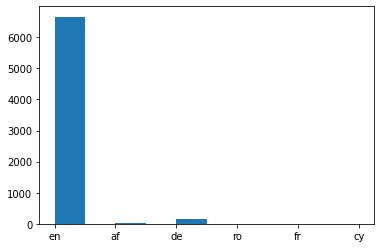

In [ ]:
plt.hist(lang_report['Lang'])
plt.show()

In [ ]:
[len(lang_report[lang_report['Lang'] == 'en']), len(lang_report[lang_report['Lang'] == 'af']), len(lang_report[lang_report['Lang'] == 'de']), len(lang_report[lang_report['Lang'] == 'ro']), len(lang_report[lang_report['Lang'] == 'fr']), len(lang_report[lang_report['Lang'] == 'cy'])]

[6661, 15, 143, 3, 2, 1]

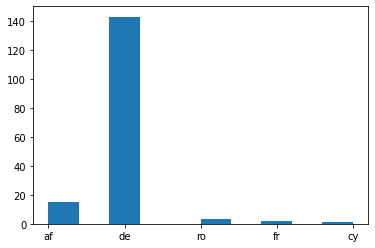

In [ ]:
plt.hist(lang_report[lang_report['Lang'] != 'en']['Lang'])
plt.show()

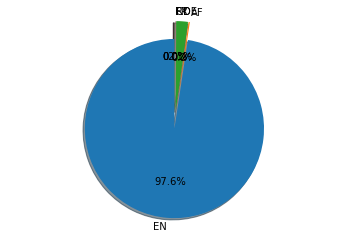

In [ ]:
labels = 'EN', 'AF', 'DE', 'RO', 'FR', 'CY'
sizes = [len(lang_report[lang_report['Lang'] == 'en']), len(lang_report[lang_report['Lang'] == 'af']), len(lang_report[lang_report['Lang'] == 'de']), len(lang_report[lang_report['Lang'] == 'ro']), len(lang_report[lang_report['Lang'] == 'fr']), len(lang_report[lang_report['Lang'] == 'cy'])]
explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

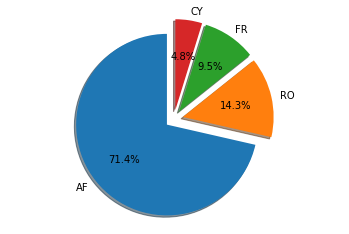

In [ ]:
labels = 'AF', 'RO', 'FR', 'CY'
sizes = [len(lang_report[lang_report['Lang'] == 'af']), len(lang_report[lang_report['Lang'] == 'ro']), len(lang_report[lang_report['Lang'] == 'fr']), len(lang_report[lang_report['Lang'] == 'cy'])]
explode = (0.1, 0.1, 0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

### **CLD-3 :**

In [ ]:
cld_report = pd.read_csv('cld3_report_1.csv')

In [ ]:
cld_report.head()

,ItemID,Lang
0,7985785,"LanguagePrediction(language='en', probability=..."
1,4837660,"LanguagePrediction(language='en', probability=..."
2,4466444,"LanguagePrediction(language='en', probability=..."
3,8620634,"LanguagePrediction(language='en', probability=..."
4,8420016,"LanguagePrediction(language='en', probability=..."


Get language codes:

In [ ]:
cld_report['Lang'] = cld_report['Lang'].apply(lambda x: re.findall(r"\'([a-zA-Z\-]+)\'", x)[0])
cld_report.head()

,ItemID,Lang
0,7985785,en
1,4837660,en
2,4466444,en
3,8620634,en
4,8420016,en


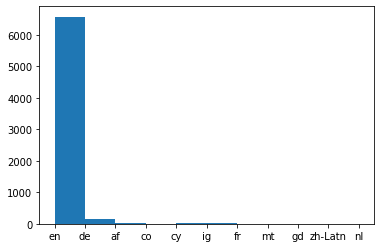

In [ ]:
plt.hist(cld_report['Lang'])
plt.show()

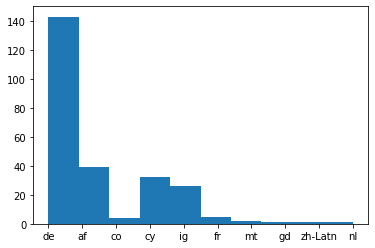

In [ ]:
plt.hist(cld_report[cld_report['Lang'] != 'en']['Lang'])
plt.show()

In [ ]:
def lng(lang_code):
  return len(cld_report[cld_report['Lang'] == lang_code])

English:

In [ ]:
lng('en')

6571

Deutsch:

In [ ]:
lng('de')

143

In [ ]:
[lng('af'), lng('co'), lng('cy'), lng('ig'), lng('mt'), lng('gd'), lng('zh-Latn'), lng('nl')]

[39, 4, 32, 26, 2, 1, 1, 1]

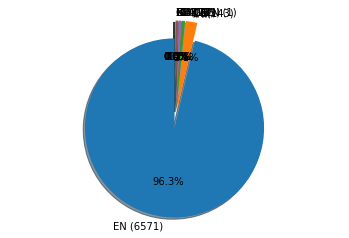

In [ ]:
labels = 'EN (6571)', 'DE(143)', 'AF (39)', 'CO (4)', 'CY (32)', 'IG (26)', 'MT (2)', 'GD (1)', 'ZH-LATN (1)', 'NL (1)'
sizes = [6571, 143, 39, 4, 32, 26, 2, 1, 1, 1]
explode = (0.1,)*10

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

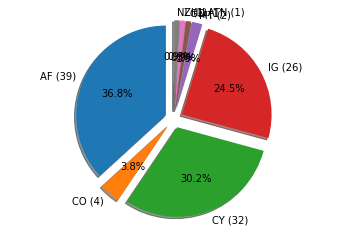

In [ ]:
labels = 'AF (39)', 'CO (4)', 'CY (32)', 'IG (26)', 'MT (2)', 'GD (1)', 'ZH-LATN (1)', 'NL (1)'
sizes = [39, 4, 32, 26, 2, 1, 1, 1]
explode = (0.1,)*8

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [ ]:
de_rep = cld_report[cld_report['Lang']!='en']

In [ ]:
de_rep = de_rep[de_rep['Lang']!='de']

**Analyze contents of de texts:**

In [ ]:
de_cont = pd.read_csv('lang_de_content.csv')

In [ ]:
de_cont[de_cont['sl'] == 4352384]

,sl,ItemID,Lang,Content
3610,4352384,de,Impact of unsuspected subsegmental pulmonary e...,PE). As a result of modern multi-detector comp...


In [ ]:
de_cont[de_cont['sl'] == 7071922]

,sl,ItemID,Lang,Content
3841,7071922,de,Successful retreatment with 3-week rituximab-b...,"JE, Cabanillas F (2001) Mantle-cell lymphoma...."


**Following articles seems to be 'en':**

*ItemID*: 4352384, 7071922

**Analyze contents of non-en and non-de texts:**

In [ ]:
lang_content = pd.read_csv('lang_out_content.csv')

In [ ]:
lang_content[:10]

,Unnamed: 0,ItemID,Lang,Title,Textpart
0,418,8928260,af,The 44th Annual Meeting of the European Societ...,ed by the European Society for Blood and Marro...
1,852,5032881,co,The 12th Edition of the Scientific Days of the...,contentsA1 The outcome of patients with recur...
2,1910,5032877,co,The 12th Edition of the Scientific Days of the...,contentsA1 The outcome of patients with recur...
3,1944,7337169,af,Risk factors for febrile neutropenia and effec...,"abstract': 'AbstractBackgroundThe docetaxel, 5..."
4,2478,5032903,co,The 12th Edition of the Scientific Days of the...,contentsA1 The outcome of patients with recur...
5,2979,6339823,af,"Irish Endocrine Society 42nd Annual Meeting, 1...","Society 42nd Annual Meeting, 19th and 20th Oc..."
6,3001,6602843,af,"Osteoporosis Conference 2018 Birmingham, UK 2 ...","Conference 2018 Birmingham, UK 2 – 4 December ..."
7,3019,4666661,cy,Hemophagocytic lymphohistiocytosis following i...,"a GE, Lehmberg K. Hemophagocytic lymphohistioc..."
8,3052,6890658,af,Society of Skeletal Radiology 38th Annual Meet...,"l Radiology 38th Annual Meeting March 8 – 11, ..."
9,3056,4544641,cy,Management of immediate hypersensitivity react...,\n\n 2000; 43: 62–3.\n\nCAS\n\n\xa0\n \n\nP...


In [ ]:
lang_content.iloc[101]['Title']

'Pancréatite aiguë secondaire à la 6-mercaptopurine : à propos d’un cas '

**Following articles seems to be non-'en':**

*ItemID*: 4874873, 5043679, 5064792, 6115046, 5081739, 5008557, 5777288, 8409006

In [ ]:
lang_content[lang_content['ItemID'].isin([4874873, 5043679, 5064792, 6115046, 5081739, 5008557, 5777288, 8409006])]

,Unnamed: 0,ItemID,Lang,Title,Textpart
13,3256,4874873,af,Nachtmerries en hallucinaties bij metoprolol,"ekten.', 'literatuur': '1.\n\nGIP databank, Zo..."
15,3428,5043679,fr,Extravasation médiastinale de chimiothérapie c...,tion par voie veineuse centrale de produits cy...
22,3790,5064792,fr,Incidence des hémorragies intracrâniennes reta...,hémorragies intracrâniennes retardées chez le...
24,3832,6115046,af,Levamisole Induced Pauci Immune Focal Necrotiz...,rticle\n\n\xa0\n \n\nPubMed\n\n\xa0\n \n...
67,5555,5081739,fr,Neuropathie périphérique sous anti-TNF alpha a...,Fα) sont prescrits de façon croissante dans le...
86,6108,5008557,nl,Dyspnoe bij nitrofurantoïne,er zijn veelvoorkomende bijwerkingen zoals mi...
97,6520,5777288,af,46. Jahrestagung der Österreichischen Gesellsc...,der Österreichischen Gesellschaft für Innere M...
102,6625,8409006,af,Apremilast for extensive and treatment-resista...,ast in the treatment of alopecia areata. Small...


Check if 'de' accurate:

In [ ]:
sum(de_cont[~de_cont['sl'].isin([4352384, 7071922])]['ItemID']!='de')

0

Create a list of non-'en' articles:

In [ ]:
s1 = pd.Series([4874873, 5043679, 5064792, 6115046, 5081739, 5008557, 5777288, 8409006], name="ItemID")
s2 = pd.Series(de_cont[~de_cont['sl'].isin([4352384, 7071922])]['sl'], name="ItemID")

non_en = pd.concat([s1, s2], axis=0)
non_en

0       4874873
1       5043679
2       5064792
3       6115046
4       5081739
         ...   
6698    6529552
6757    5597871
6799    7692616
6810    8745992
6821    7303324
Name: ItemID, Length: 149, dtype: int64

Replace all other article language to 'en': 

In [ ]:
cld_report_new = cld_report

In [ ]:
cld_report_new.loc[~cld_report_new['ItemID'].isin(non_en),'Lang'] = 'en'

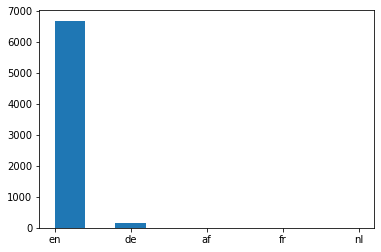

In [ ]:
plt.hist(cld_report_new['Lang'])
plt.show()

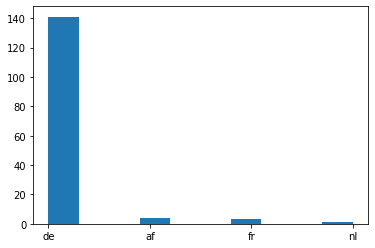

In [ ]:
plt.hist(cld_report_new[cld_report_new['Lang'] != 'en']['Lang'])
plt.show()

In [ ]:
def lng2(lang_code):
  return len(cld_report_new[cld_report_new['Lang'] == lang_code])

In [ ]:
[lng2('en'), lng2('de'), lng2('af'), lng2('fr'), lng2('nl')]

[6676, 141, 4, 3, 1]

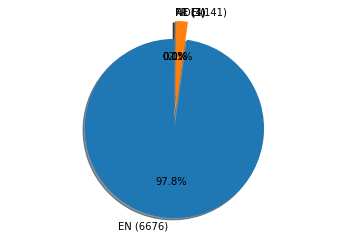

In [ ]:
labels = 'EN (6676)', 'DE (141)', 'AF (4)', 'FR (3)', 'NL (1)'
sizes = [6676, 141, 4, 3, 1]
explode = (0.1,)*5

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

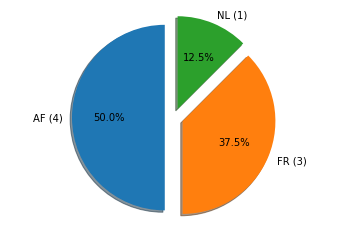

In [ ]:
labels = 'AF (4)', 'FR (3)', 'NL (1)'
sizes = [4, 3, 1]
explode = (0.1,)*3

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()